In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
#Importamos datos experimentales
medidos = pd.read_csv('../../proyecto_final_EE-main/data/weekends.csv',index_col=0,parse_dates=True,names=['tiempo','Ti_ex'],skiprows=1) 
medidos

,Ti_ex
tiempo,
2019-06-08 00:00:00,25.348056
2019-06-08 00:00:20,25.354979
2019-06-08 00:00:40,25.359593
2019-06-08 00:01:00,25.348056
2019-06-08 00:01:20,25.351517
...,...
2019-07-28 23:58:20,24.798895
2019-07-28 23:58:40,24.802356
2019-07-28 23:59:00,24.673142


In [6]:
CA = pd.read_csv('../IDF/Caso_absortancia/Proyecto_fin_absortanciaa.csv',names=['tiempo','Ti_C1','Ti_C2','Ti_CA','Ti_techo1','Ti_techo2','Ti_techoJorge'],skiprows=1)
CA.tiempo = CA.tiempo.str.replace('24:00:00','23:59:59')
CA.tiempo = '2019 ' + CA.tiempo
CA.tiempo = pd.to_datetime(CA.tiempo,format='%Y %m/%d %H:%M:%S')
CA.set_index('tiempo',inplace=True)
del CA['Ti_C1']
del CA['Ti_C2']
del CA['Ti_techo1']
del CA['Ti_techo2']
del CA['Ti_techoJorge']
CA

,Ti_CA
tiempo,
2019-05-03 00:10:00,28.394049
2019-05-03 00:20:00,28.205232
2019-05-03 00:30:00,28.213257
2019-05-03 00:40:00,28.162166
2019-05-03 00:50:00,28.092618
...,...
2019-06-25 23:20:00,8.395758
2019-06-25 23:30:00,8.327035
2019-06-25 23:40:00,8.258834


In [7]:
compara  = pd.concat([medidos,CA],axis=1)
compara

,Ti_ex,Ti_CA
tiempo,,
2019-05-03 00:10:00,NaN,28.394049
2019-05-03 00:20:00,NaN,28.205232
2019-05-03 00:30:00,NaN,28.213257
2019-05-03 00:40:00,NaN,28.162166
2019-05-03 00:50:00,NaN,28.092618
...,...,...
2019-07-28 23:58:20,24.798895,NaN
2019-07-28 23:58:40,24.802356,NaN
2019-07-28 23:59:00,24.673142,NaN


## Hacemos la gráfica de fechas de validación

### 08/06/2019

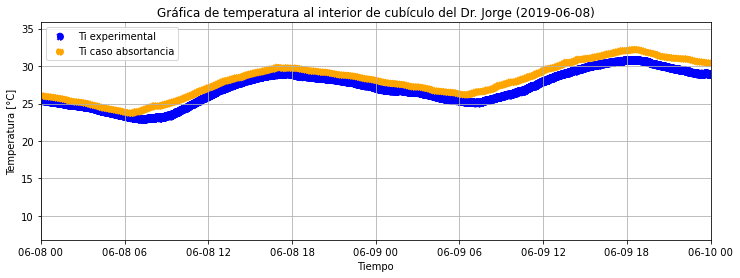

In [8]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-08')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CA, linestyle='--', linewidth=2, color='orange', label="Ti caso absortancia")
fin1 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-08)')
ax.legend()
ax.grid()

### 15/06/2019

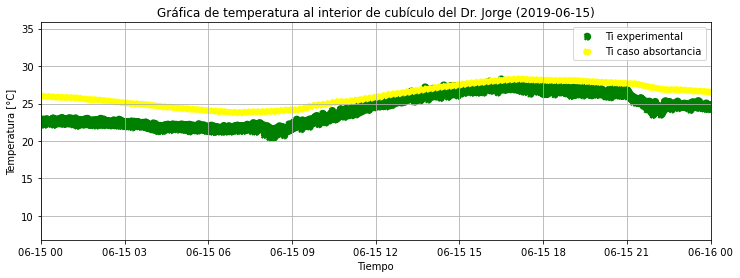

In [16]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-15')
fecha2 = fecha1 + pd.Timedelta('1D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='green', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CA, linestyle='--', linewidth=2, color='yellow', label="Ti caso absortancia")
fin2 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-15)')
ax.legend()
ax.grid()

### 22/06/2019

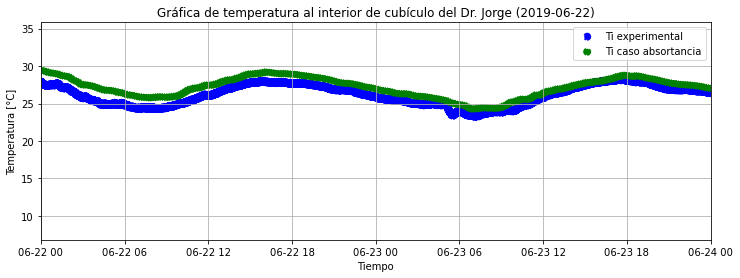

In [17]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-22')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CA, linestyle='--', linewidth=2, color='green', label="Ti caso absortancia")
fin3 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-22)')
ax.legend()
ax.grid()

In [18]:
analisis = pd.concat([fin1,fin2,fin3],axis=0)
analisis

,Ti_ex,Ti_CA
tiempo,,
2019-06-08 00:00:00,25.348056,NaN
2019-06-08 00:00:20,25.354979,NaN
2019-06-08 00:00:40,25.359593,NaN
2019-06-08 00:01:00,25.348056,NaN
2019-06-08 00:01:20,25.351517,NaN
...,...,...
2019-06-23 23:58:40,26.435996,NaN
2019-06-23 23:59:00,26.429073,NaN
2019-06-23 23:59:20,26.425612,NaN


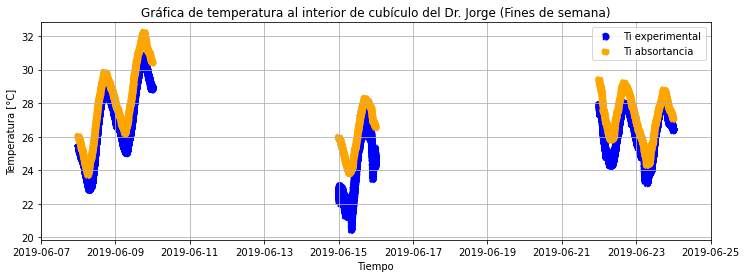

In [19]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-07')
fecha2 = fecha1 + pd.Timedelta('18D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(analisis.index,analisis.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(analisis.index,analisis.Ti_CA, linestyle='--', linewidth=2, color='orange', label="Ti absortancia")

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (Fines de semana)')
ax.legend()
ax.grid()

In [20]:
analisis.sort_index(inplace=True)

In [21]:
analisis.to_csv('../metricas/Fines_Caso_Absortancia.csv')